In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

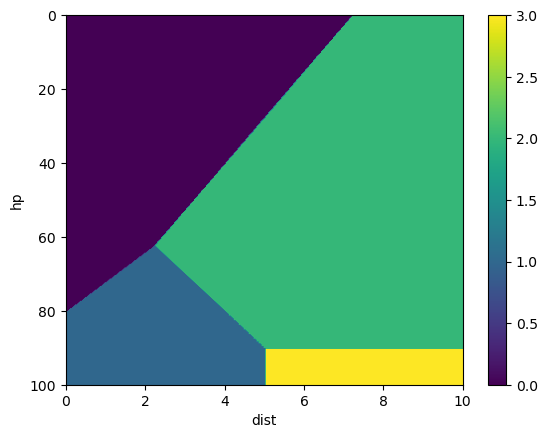

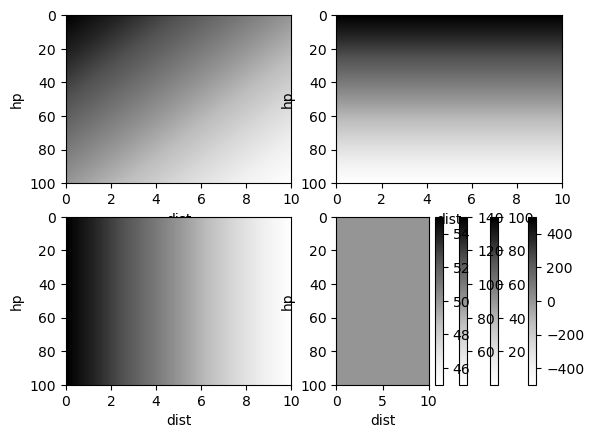

In [3]:

def flee(hp, dist):
    return (100 - hp) * 5 - 50 * dist  + np.random.randn() * 0

def attack(hp, dist):
    return 100 - 10 * dist  + np.random.randn() * 0

def patchup(hp, dist):
    return 140 - hp  + np.random.randn() * 0

def patrol(hp, dist):
    return 50  + np.random.randn() * 0 


HP = np.arange(0, 100, 0.25)
DIST = np.arange(0, 10, 0.025)
img = np.zeros((HP.shape[0], DIST.shape[0]))
ht = np.zeros((4, HP.shape[0], DIST.shape[0]))
# TODO: Vectorize
for x, hp in enumerate(HP):
    for y, ds in enumerate(DIST):
        utility = np.array([flee(hp, ds), attack(hp, ds), patchup(hp, ds), patrol(hp, ds)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, 10, 100, 0])
ax.set_aspect('auto')
ax.set_xlabel("dist")
ax.set_ylabel("hp")


plt.colorbar(im)

fig, ax = plt.subplots(2, 2)
for i in range(4):
    im = ax[i %2, i // 2].imshow(ht[i], extent=[0, 10, 100, 0], cmap='Greys')
    ax[i %2, i // 2].set_aspect('auto')
    ax[i %2, i // 2].set_xlabel("dist")
    ax[i %2, i // 2].set_ylabel("hp")
    plt.colorbar(im)

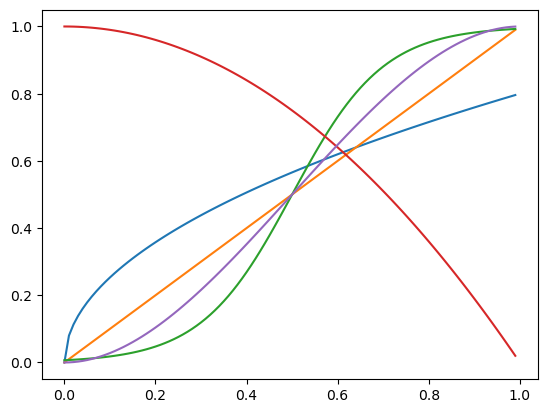

In [4]:
X = np.arange(0, 1, 0.01)
plt.plot(X, (X ** 0.5) * 0.8)
plt.plot(X, X)
plt.plot(X, 1 / (1 + np.exp(-(X * 10 - 5))))
plt.plot(X, 1 - X ** 2)
plt.plot(X, -2 * X ** 3 + 3 * X ** 2)

In [31]:
def clamp(n, smallest, largest): return max(smallest, min(n, largest))

def random_walk(baseDist, allyDist):
    return 1.0 - clamp(min(baseDist / 6.0, allyDist / 6.0), 0.25, 1.0)

def attack(baseDist, enemyDist):
    return 1.0 - clamp(baseDist / 20.0 + enemyDist / 20.0, 0.0, 1.0)

def move_to_base(enemyDist, baseDist):
    return clamp(-0.25 * enemyDist + 0.5, 0.5, 1.0) - clamp(-0.25 * baseDist + 1.25, 0.0, 0.5)


ENEMY_DIST = np.arange(0, 20, 0.25)
BASE_DIST = np.arange(0, 20, 0.25)
ALLY_DIST = np.arange(0, 20, 0.25)

img = np.zeros((ENEMY_DIST.shape[0], BASE_DIST.shape[0], ALLY_DIST.shape[0]))
ht = np.zeros((3, ENEMY_DIST.shape[0], BASE_DIST.shape[0], ALLY_DIST.shape[0]))
# TODO: Vectorize
for x, ed in enumerate(ENEMY_DIST):
    for y, bd in enumerate(BASE_DIST):
        for z, ad in enumerate(ALLY_DIST):
            utility = np.array([random_walk(bd, ad), attack(bd, ed), move_to_base(ed, bd)])
            for i in range(utility.shape[0]):
                ht[i][x][y][z] = utility[i]
            img[x][y][z] = np.argmax(utility)




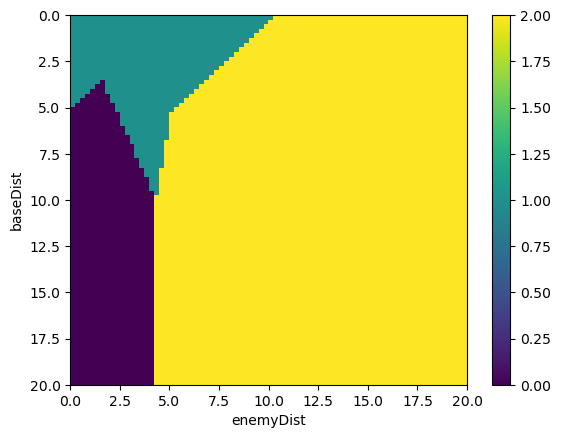

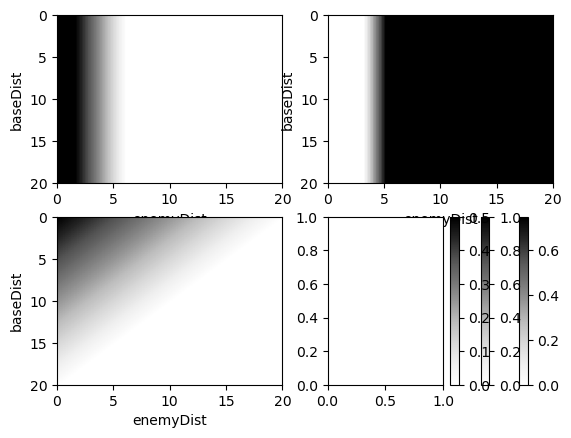

In [37]:
imgCut = img[:, :, 79]
htCut = ht[:, :, :, 79]

fig, ax = plt.subplots()
im = ax.imshow(imgCut, extent=[0, 20, 20, 0])
ax.set_aspect('auto')
ax.set_xlabel('enemyDist')
ax.set_ylabel('baseDist')


plt.colorbar(im)

fig, ax = plt.subplots(2, 2)
for i in range(3):
    im = ax[i % 2, i // 2].imshow(htCut[i], extent=[0, 20, 20, 0], cmap='Greys')
    ax[i % 2, i // 2].set_aspect('auto')
    ax[i % 2, i // 2].set_xlabel('enemyDist')
    ax[i % 2, i // 2].set_ylabel('baseDist')
    plt.colorbar(im)